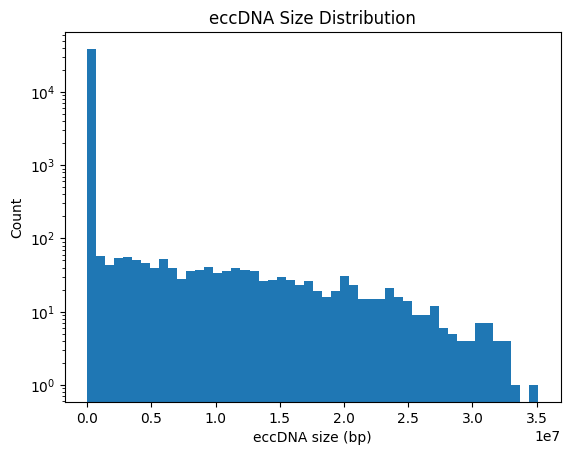

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/outputs/SRR413984_chr22.eccdna.annotated.tsv', sep='\t')

# Size distribution
sizes = df.drop_duplicates('ecc_id')['ecc_end'] - df.drop_duplicates('ecc_id')['ecc_start']
plt.hist(sizes, bins=50, log=True)
plt.xlabel('eccDNA size (bp)')
plt.ylabel('Count')
plt.title('eccDNA Size Distribution')
plt.savefig('eccdna_size_distribution.png')

In [3]:
# Classify by size (microDNA < 400bp typically)
sizes = df.drop_duplicates('ecc_id')['ecc_end'] - df.drop_duplicates('ecc_id')['ecc_start']
print(f"microDNA (<400bp): {(sizes < 400).sum()}")
print(f"eccDNA (≥400bp): {(sizes >= 400).sum()}")

microDNA (<400bp): 11549
eccDNA (≥400bp): 28299


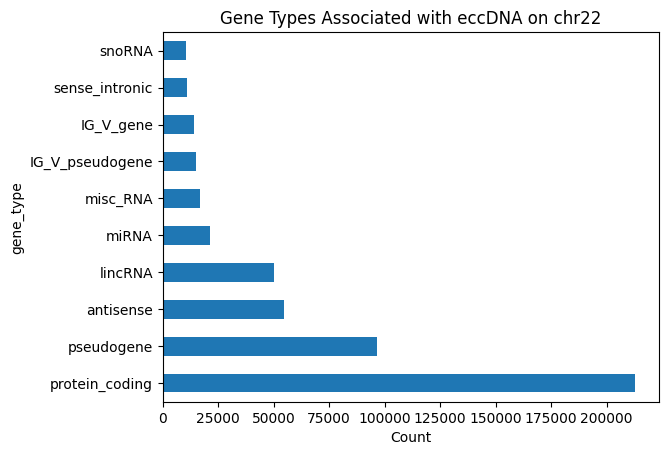

In [4]:
# What gene types are eccDNA associated with?
df['gene_type'].value_counts().head(10).plot(kind='barh')
plt.xlabel('Count'); plt.title('Gene Types Associated with eccDNA on chr22')
plt.savefig('gene_type_distribution_chr22.png')

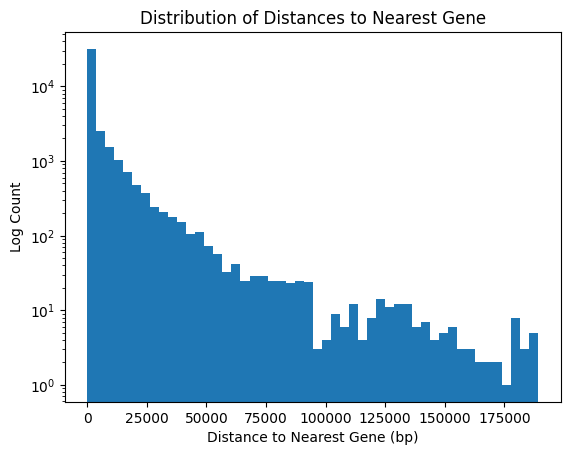

In [5]:
# Distribution of distances to nearest gene
unique_ecc = df.drop_duplicates('ecc_id')
plt.hist(unique_ecc['distance'], bins=50, log=True)
plt.xlabel('Distance to Nearest Gene (bp)')
plt.ylabel('Log Count')
plt.title('Distribution of Distances to Nearest Gene')
plt.savefig('distance_to_nearest_gene_chr22.png')
plt.show()


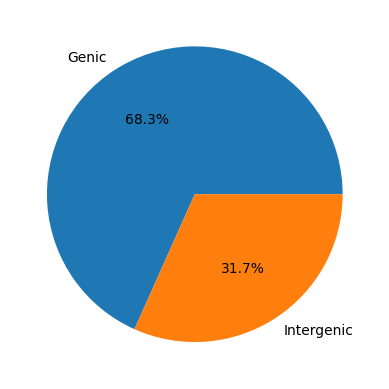

<Figure size 640x480 with 0 Axes>

In [6]:
# How many eccDNA overlap genes (distance=0) vs intergenic?
genic = (unique_ecc['distance'] == 0).sum()
intergenic = (unique_ecc['distance'] > 0).sum()
plt.pie([genic, intergenic], labels=['Genic', 'Intergenic'], autopct='%1.1f%%')
plt.show()
plt.savefig('eccDNA_genic_intergenic_pie_chr22.png')

In [7]:
# Which genes have the most eccDNA?
df[df['distance'] == 0]['gene_name'].value_counts().head(20)

gene_name
Y_RNA       5646
snoU13      4187
LARGE       1164
SYN3        1111
TTC28        953
OSBP2        935
SCARNA18     912
SCARNA17     912
DEPDC5       840
KIAA1671     830
SFI1         830
DRG1         812
NOL12        778
MYH9         777
CACNG2       771
PLA2G6       767
TNRC6B       765
TRIOBP       765
POLR2F       762
PRR14L       757
Name: count, dtype: int64